In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set

In [120]:
data = pd.read_csv('BSE_30_Data.csv')
print(data.columns)

Index(['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')


In [146]:
data

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,ADANIPORTS,05-06-2008,150.000000,153.570007,147.820007,151.149994,134.313477,1782030.0
1,ADANIPORTS,05-07-2008,152.000000,154.460007,150.240005,153.309998,136.232864,1180015.0
2,ADANIPORTS,05-08-2008,152.199997,156.759995,150.199997,155.889999,138.525497,1856245.0
3,ADANIPORTS,05-09-2008,155.000000,160.600006,154.210007,156.520004,139.085312,3251375.0
4,ADANIPORTS,05-12-2008,156.000000,163.479996,151.000000,162.500000,144.399170,5031635.0
...,...,...,...,...,...,...,...,...
73310,POWERGRID,4/27/2018,205.100006,208.750000,205.100006,207.800003,207.800003,99047.0
73311,POWERGRID,4/30/2018,207.800003,208.699997,206.800003,207.649994,207.649994,57778.0
73312,POWERGRID,05-02-2018,208.000000,208.949997,204.100006,205.050003,205.050003,103247.0
73313,POWERGRID,05-03-2018,202.500000,207.899994,202.500000,206.550003,206.550003,92484.0


In [147]:
data_pivot = data.pivot_table(index=['Symbol', 'Date'] )
df = data_pivot.loc['ADANIPORTS']

df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df=df.iloc[:,1:4]

In [148]:
df.head(timestep+1)

,Close,High,Low
Date,,,
2008-05-06,151.149994,153.570007,147.820007
2008-05-07,153.309998,154.460007,150.240005
2008-05-08,155.889999,156.759995,150.199997
2008-05-09,156.520004,160.600006,154.210007
2008-05-12,162.500000,163.479996,151.000000
2008-05-13,158.479996,165.410004,157.399994
2008-05-14,157.759995,160.399994,156.899994
2008-05-15,158.080002,161.970001,157.050003
2008-05-16,154.779999,160.000000,154.000000


In [241]:
df.describe()

,Close,High,Low
count,2461.000000,2461.000000,2461.000000
mean,201.333824,205.175567,197.970565
std,97.239175,98.362379,96.067389
min,51.480000,52.500000,50.000000
25%,129.500000,132.550003,127.000000
50%,154.199997,157.449997,151.500000
75%,284.350006,288.149994,277.450012
max,448.200012,451.549988,433.299988


### Creating a data structure with timesteps and t+1 output

In [365]:
closing_set = []
timestep=7
timestep-=1
for i in range(timestep, len(df)):
    closing_set.append(df.values[i-timestep:i,0])
closing_set = np.array(closing_set)
closing_set.shape

(2455, 6)

In [366]:
modified_df=np.hstack((closing_set,df.values[timestep-1:-1,1:],df.values[timestep:,:1]))
modified_df.shape

(2455, 9)

In [367]:
col_labels=[]
for i in range(timestep-1,0,-1):
    col_labels.append(f"Close_i-{i},")

col_labels.extend(["Close_i","High_i","Low_i","Close_i+1"])

In [368]:
col_labels

['Close_i-5,',
 'Close_i-4,',
 'Close_i-3,',
 'Close_i-2,',
 'Close_i-1,',
 'Close_i',
 'High_i',
 'Low_i',
 'Close_i+1']

In [369]:
modified_df=pd.DataFrame(modified_df,columns=col_labels)
modified_df.index=df[timestep-1:-1].index

# Modified Dataset for RNN prediction

In [370]:
modified_df

,"Close_i-5,","Close_i-4,","Close_i-3,","Close_i-2,","Close_i-1,",Close_i,High_i,Low_i,Close_i+1
Date,,,,,,,,,
2008-05-13,151.149994,153.309998,155.889999,156.520004,162.500000,158.479996,165.410004,157.399994,157.759995
2008-05-14,153.309998,155.889999,156.520004,162.500000,158.479996,157.759995,160.399994,156.899994,158.080002
2008-05-15,155.889999,156.520004,162.500000,158.479996,157.759995,158.080002,161.970001,157.050003,154.779999
2008-05-16,156.520004,162.500000,158.479996,157.759995,158.080002,154.779999,160.000000,154.000000,176.960007
2008-05-20,162.500000,158.479996,157.759995,158.080002,154.779999,176.960007,181.100006,153.570007,180.289993
...,...,...,...,...,...,...,...,...,...
2018-04-26,386.450012,381.250000,385.250000,391.950012,392.100006,396.450012,398.000000,388.000000,401.450012
2018-04-27,381.250000,385.250000,391.950012,392.100006,396.450012,401.450012,405.049988,399.000000,406.450012
2018-04-30,385.250000,391.950012,392.100006,396.450012,401.450012,406.450012,410.799988,399.000000,399.899994


### Feature Scaling

In [371]:
max_val=modified_df.max().max()
modified_df=(modified_df)/max_val
modified_df.head()

,"Close_i-5,","Close_i-4,","Close_i-3,","Close_i-2,","Close_i-1,",Close_i,High_i,Low_i,Close_i+1
Date,,,,,,,,,
2008-05-13,0.334736,0.339519,0.345233,0.346628,0.359872,0.350969,0.366316,0.348577,0.349374
2008-05-14,0.339519,0.345233,0.346628,0.359872,0.350969,0.349374,0.355221,0.347470,0.350083
2008-05-15,0.345233,0.346628,0.359872,0.350969,0.349374,0.350083,0.358698,0.347802,0.342775
2008-05-16,0.346628,0.359872,0.350969,0.349374,0.350083,0.342775,0.354335,0.341048,0.391895
2008-05-20,0.359872,0.350969,0.349374,0.350083,0.342775,0.391895,0.401063,0.340095,0.399269


In [372]:
dataset_train=modified_df[:int(len(modified_df)*0.8)]
dataset_valid=modified_df[int(len(modified_df)*0.8):int(len(modified_df)*0.9)]
dataset_test =modified_df[int(len(modified_df)*0.9):]

In [373]:
dataset_train.shape,dataset_valid.shape,dataset_test.shape

((1964, 9), (245, 9), (246, 9))

# Splitting train test valid

In [374]:
X_train,y_train=dataset_train.values[:,:-1],dataset_train.values[:,-1]
X_valid,y_valid=dataset_valid.values[:,:-1],dataset_valid.values[:,-1]
X_test,y_test=dataset_test.values[:,:-1],dataset_test.values[:,-1]
X_train.shape,y_train.shape

((1964, 8), (1964,))

In [375]:
X_train=X_train[:,:,np.newaxis]
X_valid=X_valid[:,:,np.newaxis]
X_test=X_test[:,:,np.newaxis]
X_train.shape,X_valid.shape,X_test.shape

((1964, 8, 1), (245, 8, 1), (246, 8, 1))

# Defining RNN Model in Tensorflow

In [385]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3, input_shape = (None, 1),return_sequences=True)) # if >1 lstm layer put return_sequences=True here

# Adding a second LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# Adding a third LSTM layer
regressor.add(LSTM(units = 3, return_sequences = True))

# # Adding a fourth LSTM layer
regressor.add(LSTM(units = 3)) 
#last lstm layer return_sequences=False for Next dense layer


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

In [386]:
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, None, 3)           60        
_________________________________________________________________
lstm_25 (LSTM)               (None, None, 3)           84        
_________________________________________________________________
lstm_26 (LSTM)               (None, None, 3)           84        
_________________________________________________________________
lstm_27 (LSTM)               (None, 3)                 84        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 316
Trainable params: 316
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN to the Training set

In [387]:
regressor.fit(X_train, y_train,validation_data=(X_valid,y_valid), epochs = 20, batch_size = 10)

Train on 1964 samples, validate on 245 samples
Epoch 1/20
1964/1964 [==============================] - 14s 7ms/sample - loss: 0.0411 - val_loss: 0.0394
Epoch 2/20
1964/1964 [==============================] - 8s 4ms/sample - loss: 0.0055 - val_loss: 7.0434e-04
Epoch 3/20
1964/1964 [==============================] - 8s 4ms/sample - loss: 5.4859e-04 - val_loss: 7.0943e-04
Epoch 4/20
1964/1964 [==============================] - 7s 4ms/sample - loss: 5.2504e-04 - val_loss: 6.7514e-04
Epoch 5/20
1964/1964 [==============================] - 7s 4ms/sample - loss: 5.3431e-04 - val_loss: 7.8596e-04
Epoch 6/20
1964/1964 [==============================] - 7s 4ms/sample - loss: 5.2605e-04 - val_loss: 7.5559e-04
Epoch 7/20
1964/1964 [==============================] - 8s 4ms/sample - loss: 5.0652e-04 - val_loss: 0.0012
Epoch 8/20
1964/1964 [==============================] - 9s 5ms/sample - loss: 5.2237e-04 - val_loss: 8.0354e-04
Epoch 9/20
1964/1964 [==============================] - 9s 5ms/sample - 

# Predicting on Train Set

In [391]:
predicted_stocks_train = regressor.predict(X_train)

# Running on Test Set

In [392]:
predicted_stocks_test = regressor.predict(X_test)

# Visualising the Train results

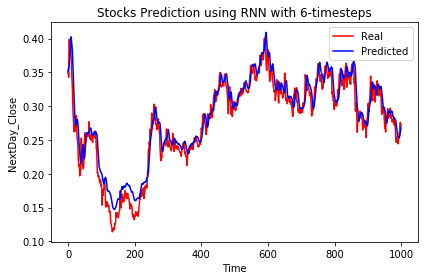

In [395]:
plt.plot(y_train[:1000], color = 'red', label = 'Real')
plt.plot(predicted_stocks_train[:1000]*1.05, color = 'blue', label = 'Predicted')
plt.title(f'Stocks Prediction using RNN with {timestep}-timesteps')
plt.xlabel('Time')
plt.ylabel('NextDay_Close')
plt.legend()
plt.tight_layout()
plt.show()

# Visualising the results

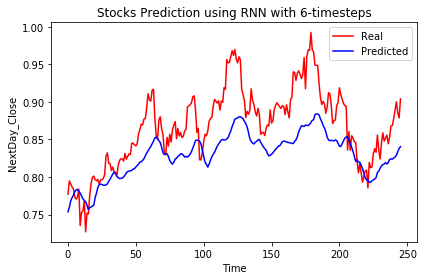

In [397]:
plt.plot(y_test, color = 'red', label = 'Real')
plt.plot(predicted_stocks*1.05, color = 'blue', label = 'Predicted')
plt.title(f'Stocks Prediction using RNN with {timestep}-timesteps')
plt.xlabel('Time')
plt.ylabel('NextDay_Close')
plt.legend()
plt.tight_layout()
plt.show()